# This project uses a neural network call Long Short Term Memory (LSTM) to predict the closing price of a corporation (TSLA Inc.) using the past 60 days closing price.


In [157]:
!pip install yfinance
!pip install tensorflow
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from keras.models import load_model
plt.style.use('fivethirtyeight')
import yfinance as yf

In [158]:
df = yf.download('TSLA', start='2015-01-01', end='2025-02-13')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...
2025-02-06,374.320007,375.399994,363.179993,373.029999,77918200
2025-02-07,361.619995,380.549988,360.339996,370.190002,70298300


In [159]:
#Analysis how many rows and columns
df.shape

(2544, 5)

Text(0, 0.5, 'Close Price USD ($)')

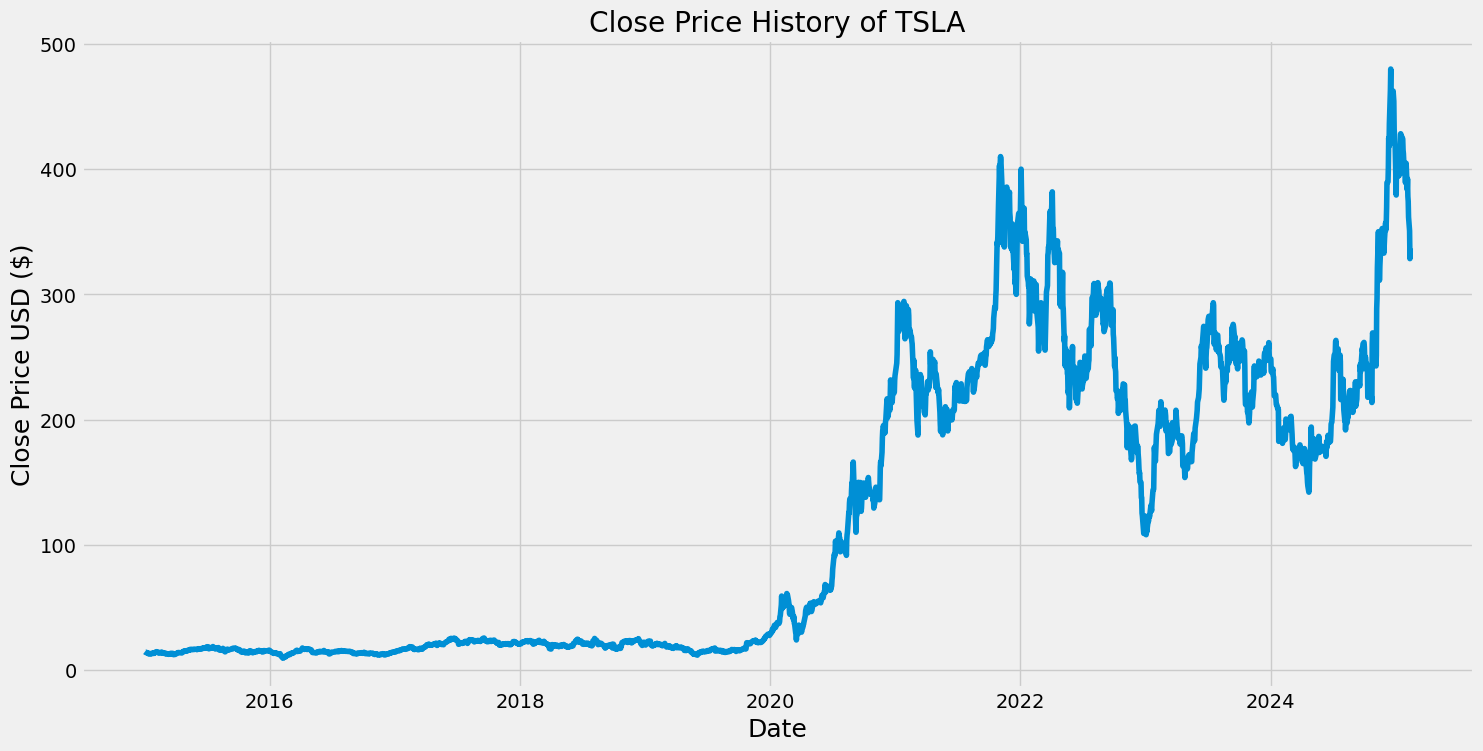

In [160]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History of TSLA')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [161]:
#Create a new dataframe with only the "Close" column
data = df[['Close']]
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

2036

In [162]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01072265],
       [0.00941563],
       [0.00958432],
       ...,
       [0.72542011],
       [0.67815058],
       [0.69518293]])

In [163]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01072265, 0.00941563, 0.00958432, 0.00953754, 0.00949076,
       0.00892939, 0.00829857, 0.00858776, 0.00694902, 0.00683278,
       0.00700289, 0.00684128, 0.00749905, 0.00821493, 0.00816815,
       0.0089138 , 0.008833  , 0.00789597, 0.00872243, 0.00849561,
       0.00953612, 0.01058797, 0.01061491, 0.0109608 , 0.01044622,
       0.01046323, 0.01029453, 0.0097998 , 0.00839355, 0.00851971,
       0.00860193, 0.00861752, 0.00964528, 0.01041077, 0.00902579,
       0.00856791, 0.00851829, 0.00900453, 0.00845875, 0.00760678,
       0.00792291, 0.00833117, 0.00807459, 0.00711771, 0.00669244,
       0.00661305, 0.00709787, 0.00671937, 0.00638057, 0.00737572,
       0.00723821, 0.00808593, 0.00736863, 0.0077131 , 0.00793283,
       0.00822911, 0.00717725, 0.00662581, 0.0058589 , 0.00664849])]
[0.006393328324786535]

[array([0.01072265, 0.00941563, 0.00958432, 0.00953754, 0.00949076,
       0.00892939, 0.00829857, 0.00858776, 0.00694902, 0.00683278,
       0.00700289, 0.00684128, 0.0

In [164]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the x_train data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1976, 60, 1)

In [165]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [166]:
#After builing the model, we compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [167]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1)

1976/1976 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0056


In [168]:
#Save the model
model.save('lstm_stock_model.h5')

In [169]:
# Load the saved model
model = load_model('lstm_stock_model.h5')

In [170]:
#Create the testing data set
#Create a new arrary containing the scaled value data set
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [171]:
x_test = np.array(x_test)
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [172]:
#Get the model predicted price values
predictions  = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [173]:
#Get the root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

21.978721390965013

/var/folders/nm/51lmqz9n04n1npy_sn6h3m9h0000gn/T/ipykernel_35864/513670185.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


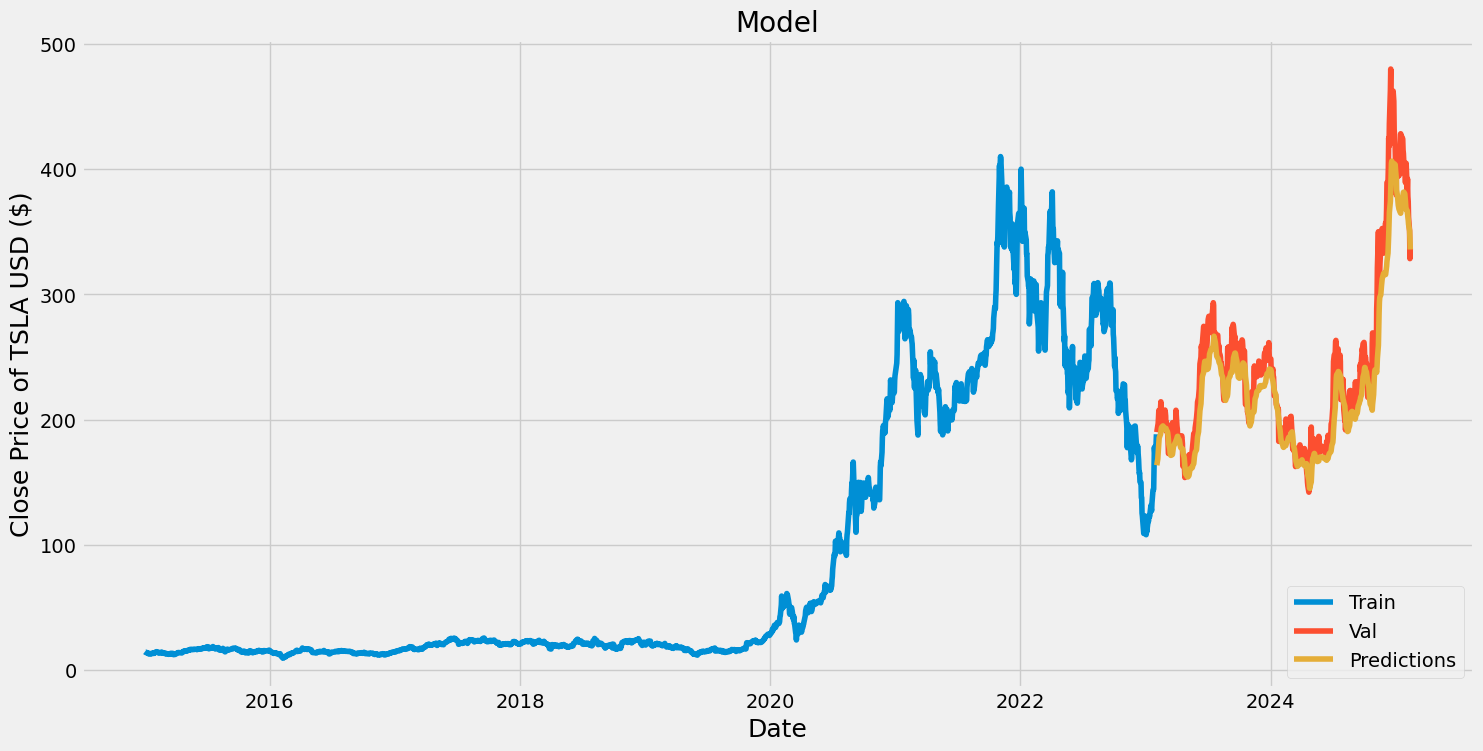

In [174]:
#Plotting and visualizing the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price of TSLA USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [175]:
# Get the last 60 days closing price and convert it into an array
last_60_days = data[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# Predict the next month's prices
next_month_predictions = []

for i in range(30):
    # Create an empty list
    X_test = []
    # Append the last 60 days
    X_test.append(last_60_days_scaled)
    # Convert the X_test data set to a numpy array
    X_test = np.array(X_test)
    # Reshape the data into 3-dimensional
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    # Get the predicted scaled price
    pred_price = model.predict(X_test)
    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)
    next_month_predictions.append(pred_price[0][0])
    # Update the last 60 days with the new predicted price
    last_60_days_scaled = np.append(last_60_days_scaled[1:], scaler.transform(pred_price), axis=0)

print("Next month's predicted prices:", next_month_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

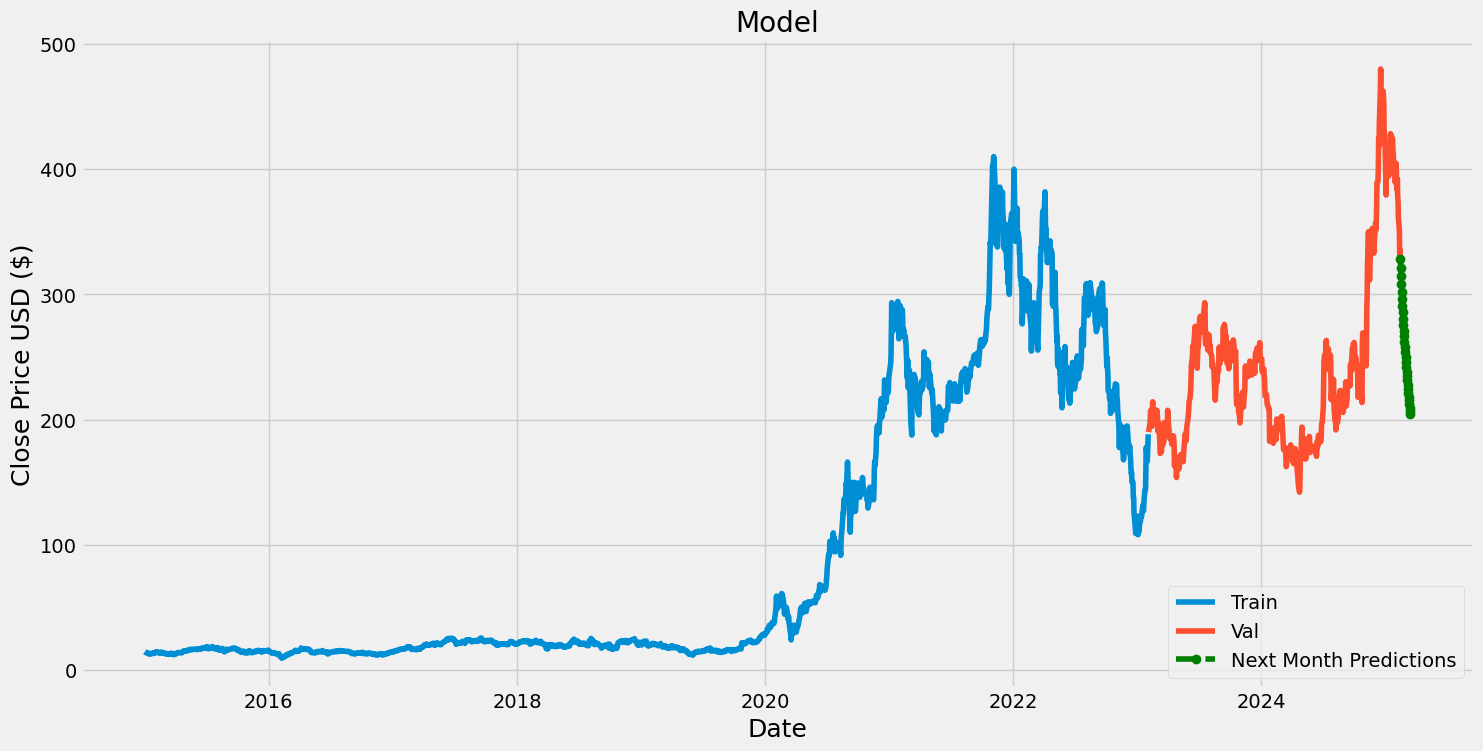

In [176]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

# Create a new dataframe for the next month's predictions
next_month_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)
next_month_df = pd.DataFrame(next_month_predictions, index=next_month_dates, columns=['Predictions'])

# Plot the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(next_month_df['Predictions'], color='green', linestyle='dashed', marker='o')
plt.legend(['Train', 'Val', 'Next Month Predictions'], loc='lower right')
plt.show()